# About Dataset
#### E-commerce (electronic commerce) is the buying and selling of goods and services, or the transmitting of funds or data, over an electronic network, primarily the internet. These business transactions occur either as business-to-business (B2B), business-to-consumer (B2C), consumer-to-consumer or consumer-to-businessظ



### 1 - import the libraries and reading and cleaning the dataset

In [1]:
import pandas as pd
import numpy as nu
import plotly.express as px
import matplotlib.pyplot as plt
template_style = "plotly_dark"

In [2]:
data = pd.read_excel('C:\\Users\\abdh-\\OneDrive\\سطح المكتب\\Projects\\project_7\\E-commerce.xlsx')

In [3]:
data.head(3)        #read 3 of the rowes

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,35,CA-2017-107727,2020-10-19,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468


#### cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3312 non-null   int64         
 1   Order ID       3312 non-null   object        
 2   Order Date     3312 non-null   datetime64[ns]
 3   Ship Mode      3312 non-null   object        
 4   Customer ID    3312 non-null   object        
 5   Customer Name  3312 non-null   object        
 6   Segment        3312 non-null   object        
 7   Country        3312 non-null   object        
 8   City           3312 non-null   object        
 9   State          3312 non-null   object        
 10  Postal Code    3312 non-null   int64         
 11  Region         3312 non-null   object        
 12  Product ID     3312 non-null   object        
 13  Category       3312 non-null   object        
 14  Sub-Category   3312 non-null   object        
 15  Product Name   3312 n

#### theres a lot of spaces between the names columns , lts change it to '_'

In [5]:
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")       ## change the names 

In [6]:
data.shape

(3312, 20)

#### There are a lot of columns, let's try to reduce the number

In [7]:
data.head(1)

,row_id,order_id,order_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432


#### we dont need (row_id) , (order_id) , (customer_id) , (country) , (postal_code) , (product_id) 

In [8]:
data = data.drop(columns=['row_id', 'order_id' , 'customer_id', 'country' , 'postal_code', 'product_id' ])

In [9]:
data

,order_date,ship_mode,customer_name,segment,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit
0,2020-04-15,Standard Class,Andrew Allen,Consumer,Concord,North Carolina,South,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,2020-07-16,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,2020-10-19,Second Class,Matt Abelman,Home Office,Houston,Texas,Central,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
3,2020-09-10,Standard Class,Linda Cazamias,Corporate,Naperville,Illinois,Central,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
4,2020-09-19,Standard Class,Erin Smith,Corporate,Melbourne,Florida,South,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-11-17,Standard Class,Ruben Ausman,Corporate,Athens,Georgia,South,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
3308,2020-02-26,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
3309,2020-02-26,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
3310,2020-02-26,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


#### is there any duplicated value?

In [10]:
data.duplicated().value_counts()

False    3312
dtype: int64

#### any null value?

In [11]:
data.isnull().sum()

order_date       0
ship_mode        0
customer_name    0
segment          0
city             0
state            0
region           0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

## Data Preperation & Analysis
### 🚩 TASKS:

## What was the highest Sale in 2020?
## What is average discount rate of charis?
## What are the highest selling months in 2020?
## What is the Profit Margin for each sales record?
## How much profit is gained for each product?
## What is the total Profit & Sales by Sub-Category?
## the top 10 city/state shop the most?

#### What was the highest Sales?

In [12]:
data.nlargest(1, 'sales')
# data.iloc[data['sales'].argmax()]     This is anthor way

,order_date,ship_mode,customer_name,segment,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit
2710,2020-03-23,First Class,Raymond Buch,Consumer,Seattle,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808


#### the highest Sale in 2020 was in (2020-03-23) and its (Copiers) (4 quantity) by (13999.96) and the profit was (6719.9808)

#### What is average Discount of charis?

In [13]:
# Create Boolean mask
mask = data['sub-category'] == 'Chairs'

# Use Boolean mask to filter dataframe
data[mask]['discount'].mean()

0.16736842105263158

#### the average Discount of charis is : (0.16737)

#### What is the highest selling months in 2020?

#### we need to  add an extra column for "Order Month" and ill add "Order Year" too

In [14]:
data['Order Date Year'] = data.order_date.dt.year
data['Order Date Month'] = data.order_date.dt.month
data.head(2)

,order_date,ship_mode,customer_name,segment,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit,Order Date Year,Order Date Month
0,2020-04-15,Standard Class,Andrew Allen,Consumer,Concord,North Carolina,South,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020,4
1,2020-07-16,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2020,7


In [15]:
group_by = data.groupby(['Order Date Month']).sum()
group_by.nlargest(3 , "sales")

C:\Users\abdh-\AppData\Local\Temp\ipykernel_8600\2051917560.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by = data.groupby(['Order Date Month']).sum()


,sales,quantity,discount,profit,Order Date Year
Order Date Month,,,,,
11,118447.8250,1840,73.89,9690.1037,927180
9,87866.6520,1660,67.65,10991.5556,927180
12,83829.3188,1723,67.72,8483.3468,933240


#### so the highest selling months in 2020 Is: 
#### (11) -->(118447.8250)
#### (9) -->(87866.6520)
#### (12) -->(83829.3188)

#### What is the Profit Margin for each sales record?

#### Add a new column to calculate the Profit Margin for each sales record

In [16]:
data['Profit_Margin'] = data['profit'] / data['sales']
data.head()

,order_date,ship_mode,customer_name,segment,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit,Order Date Year,Order Date Month,Profit_Margin
0,2020-04-15,Standard Class,Andrew Allen,Consumer,Concord,North Carolina,South,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020,4,0.350000
1,2020-07-16,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2020,7,-0.014286
2,2020-10-19,Second Class,Matt Abelman,Home Office,Houston,Texas,Central,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2020,10,0.337500
3,2020-09-10,Standard Class,Linda Cazamias,Corporate,Naperville,Illinois,Central,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2020,9,0.112500
4,2020-09-19,Standard Class,Erin Smith,Corporate,Melbourne,Florida,South,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2020,9,0.100000


#### lets build a function, to return a dataframe which is grouped by a particular column (as an input)

In [17]:
# Groupby as a function
def grouped_data(column_name):
    '''
    Groupby column and return DataFrame
    Input: Column Name
    '''
    df_tmp = data.groupby(column_name).sum()
    df_tmp.reset_index(inplace=True)
    return df_tmp
    
# Group DataFrame by Segment
grouped_data('sales')

C:\Users\abdh-\AppData\Local\Temp\ipykernel_8600\1487224324.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tmp = data.groupby(column_name).sum()


,sales,quantity,discount,profit,Order Date Year,Order Date Month,Profit_Margin
0,0.444,1,0.8,-1.1100,2020,6,-2.500000
1,0.556,1,0.8,-0.9452,2020,3,-1.700000
2,0.990,1,0.0,0.4356,2020,10,0.440000
3,1.080,2,0.7,-0.7920,2020,7,-0.733333
4,1.188,1,0.8,-1.9602,2020,5,-1.650000
...,...,...,...,...,...,...,...
2618,5443.960,4,0.0,2504.2216,2020,1,0.460000
2619,7999.980,4,0.5,-3839.9904,2020,11,-0.480000
2620,10499.970,3,0.0,5039.9856,2020,11,0.480000
2621,11199.968,4,0.2,3919.9888,2020,10,0.350000


In [18]:
# Quick Stats Overview for Sales
data.sales.describe()

count     3312.000000
mean       221.381418
std        585.257531
min          0.444000
25%         17.018000
50%         53.810000
75%        205.105700
max      13999.960000
Name: sales, dtype: float64

#### Distribution Sales [Histogram]

In [19]:
# Create Chart
fig = px.histogram(data,
                  x="sales",
                  template=template_style)
# Plot Chart
fig.show()

#### Show the distribution and skewness of Sales [Boxplot]

In [20]:
# Create Chart
fig = px.box(data,
             y="sales",
             range_y=[0,1000],
             template=template_style)
# Plot Chart
fig.show()

In [21]:
# Create Dataframe
sub_data = grouped_data('sub-category')
sub_data.head()

C:\Users\abdh-\AppData\Local\Temp\ipykernel_8600\1487224324.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,sub-category,sales,quantity,discount,profit,Order Date Year,Order Date Month,Profit_Margin
0,Accessories,59946.2320,1079,19.80,15672.3570,555500,2153,62.655000
1,Appliances,42926.9320,654,29.10,7865.2683,333300,1255,-36.133889
2,Art,8863.0680,1101,22.20,2221.9631,569640,2146,70.995000
3,Binders,72788.0450,2067,189.10,7669.7418,1010000,3841,-107.832500
4,Bookcases,30024.2797,276,16.32,-583.6261,153520,552,-11.233641


#### How much profit is gained for each product in sub-category?

In [22]:
# Create Chart
fig = px.bar(sub_data,
             x='sub-category',
             y='profit',
             title='<b>Profit by Sub Category</b>',
             template = template_style)

# Display Plot
fig.show()
sub_data[['sub-category' , 'profit']]
# Export Chart to HTML
# plt.offline.plot(fig, filename='output/Profit_Sub_Cat.html', auto_open = False)

,sub-category,profit
0,Accessories,15672.3570
1,Appliances,7865.2683
2,Art,2221.9631
3,Binders,7669.7418
4,Bookcases,-583.6261
5,Chairs,7643.5493
6,Copiers,25031.7902
7,Envelopes,1441.7590
8,Fasteners,304.9489
9,Furnishings,4099.1628


#### How much sales is gained for each product in sub-category?

In [23]:
# Create Chart
fig = px.bar(sub_data,
             x='sub-category',
             y='sales',
             title='<b>Sales_by_Sub_Category</b>',
             template = template_style)

# Display Plot
fig.show()

# Export Chart to HTML
# plt.offline.plot(fig, filename= "C:\\Users\\abdh-\\OneDrive\\سطح المكتب\\Projects\\project_7\\Sales_Profit_Scatterplot.html", auto_open=False)

## What is the total Profit & Sales by Sub-Category?

In [24]:
# Create Chart
fig = px.bar(sub_data,
             x='sub-category',
             y='sales',
             color='profit',
             color_continuous_scale=["red","yellow","green"],
             template = template_style,
             title = '<b>Sales & Profit by Sub Category</b>')

# Display Plot
fig.show()

#### Inspect Negative Profit of Tables
##### Is there any linear correlation between Sales/Profit & Discount? [Scatterplot]

In [25]:
# Create Chart
fig = px.scatter(data,
                 x='sales',
                 y='profit',
                 color='discount',
                 template = template_style,
                 title = '<b>Scatterplot Sales/Profit</b>')

# Display Plot
fig.show()

#### Check Discount mean by Sub Category

In [26]:
# Create new dataframe: Group by 'Sub-Category' and aggregate the mean of 'Discount'
df_discount = data.groupby('sub-category').agg({'discount':'mean',
                                              'profit':'sum'})

# Display first 5 rows of new dataframe
df_discount.head()

,discount,profit
sub-category,,
Accessories,0.072000,15672.3570
Appliances,0.176364,7865.2683
Art,0.078723,2221.9631
Binders,0.378200,7669.7418
Bookcases,0.214737,-583.6261


#### Plot Mean Discount by Sub Category

In [27]:
# Create Chart
fig = px.bar(df_discount,
             x=df_discount.index,
             y='discount',
             color='profit',
             color_continuous_scale=['red','yellow','green'],
             template = template_style,
             title = '<b>Mean Discount by Sub Category</b>')

# Display Plot
fig.show()

#### Plot Sales & Profit Development for the year 2020

In [28]:
# Sort Values by Order Date
df_sorted = data.sort_values(by=['order_date'])

# Add cummulative Sales & Profit
df_sorted['cummulative_sales'] = df_sorted['sales'].cumsum()
df_sorted['cummulative_profit'] = df_sorted['profit'].cumsum()

# Print tail & head of sorted dataframe
df_sorted.head()

,order_date,ship_mode,customer_name,segment,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit,Order Date Year,Order Date Month,Profit_Margin,cummulative_sales,cummulative_profit
2679,2020-01-01,Standard Class,Janet Martin,Consumer,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,2020,1,-0.2375,454.560,-107.9580
2685,2020-01-01,Standard Class,Janet Martin,Consumer,Huntsville,Texas,Central,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2,0.8,-38.8212,2020,1,-2.5500,469.784,-146.7792
232,2020-01-01,Standard Class,Guy Armstrong,Consumer,Lorain,Ohio,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,2020,1,0.1750,518.680,-138.2224
2684,2020-01-01,Standard Class,Janet Martin,Consumer,Huntsville,Texas,Central,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842,2020,1,-1.6500,532.428,-160.9066
2683,2020-01-01,Standard Class,Janet Martin,Consumer,Huntsville,Texas,Central,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050,2020,1,-1.5000,538.898,-170.6116


In [29]:
# Create Chart
fig = px.line(df_sorted,
              x='order_date',
              y=['cummulative_sales','cummulative_profit'],
              template = template_style,
              title= '<b>Sales/Profit Development</b>')

# Display Plot
fig.show()

###  The top 10 city/state shop the most?

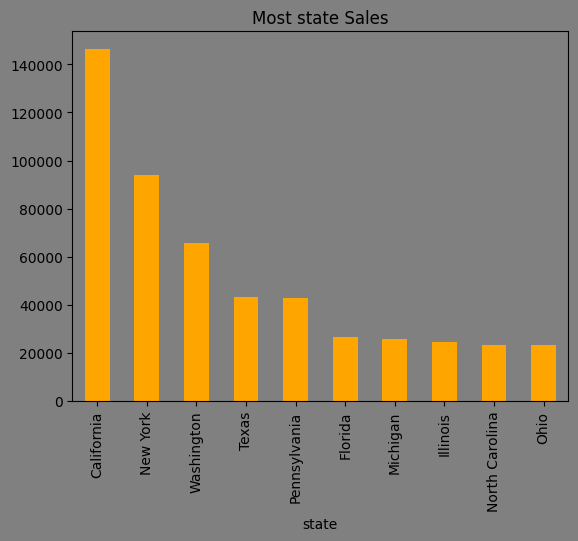

In [30]:
# The most state that has most Sales.
figgg , ax = plt.subplots(facecolor='gray')
t_c_s = data.groupby(['state'])['sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Most state Sales', color='orange')
ax.set_facecolor("gray")
ax.set_clip_on(False)


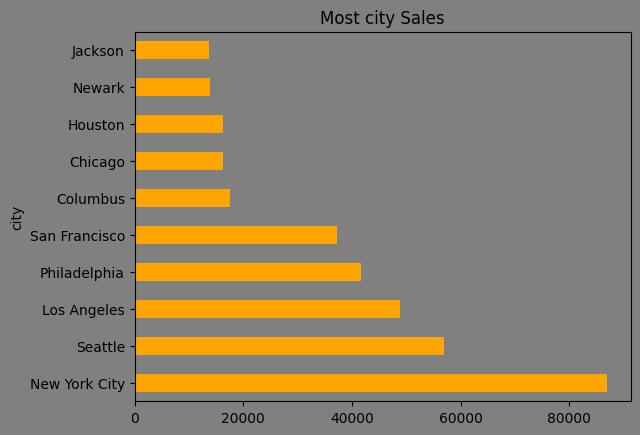

In [31]:
# The most city that has most Sales.
x , axx = plt.subplots(facecolor='gray')
data.groupby(['city'])['sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title='Most city Sales' , color = 'orange')
axx.set_facecolor("gray")
axx.set_clip_on(False)
plt.show()

#### Export the data back to excel

In [32]:
# data.to_excel("C:\\Users\\abdh-\\OneDrive\\سطح المكتب\\Projects\\project_7\\E-commerce_output.xlsx", index=False)

End